In [1]:
%matplotlib ipympl
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.ndimage import gaussian_filter
from scipy.spatial.distance import cdist
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
file_path = "/media/matt/SCRATCH/ActiveMatterWorms/notebooks/anim_frames_nocolor_02_02/tracks124.csv"

with open(file_path,'r') as file:
    first_line = file.readline().strip()
    column_names = first_line.split(",")
    column_names[0]=column_names[0][:-3]
    column_names[1]=column_names[1][:-3]
    
data = pd.read_csv(file_path,skiprows=1,names=column_names)
print(data.head())

   Track  Slice    X    Y  Distance  Velocity  Pixel Value
0      1      1  812  401    -1.000    -1.000    -12816230
1      1      2  811  409     1.040     0.520           -1
2      1      3  805  419     1.504     0.752      -655361
3      1      4  795  428     1.736     0.868         -257
4      1      5  806  420     1.755     0.877           -1


In [3]:
data_track_1 = data[data['Track'] == 1]
data_track_2 = data[data['Track'] == 2]
data_track_3 = data[data['Track'] == 4]

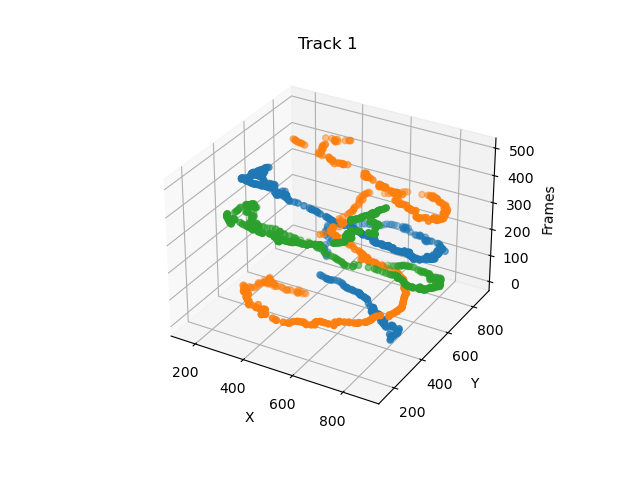

In [4]:


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_track_1['X'],data_track_1['Y'],data_track_1['Slice'])
ax.scatter(data_track_2['X'],data_track_2['Y'],data_track_2['Slice'])
ax.scatter(data_track_3['X'],data_track_3['Y'],data_track_3['Slice'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Frames')
ax.set_title('Track 1')
plt.show()

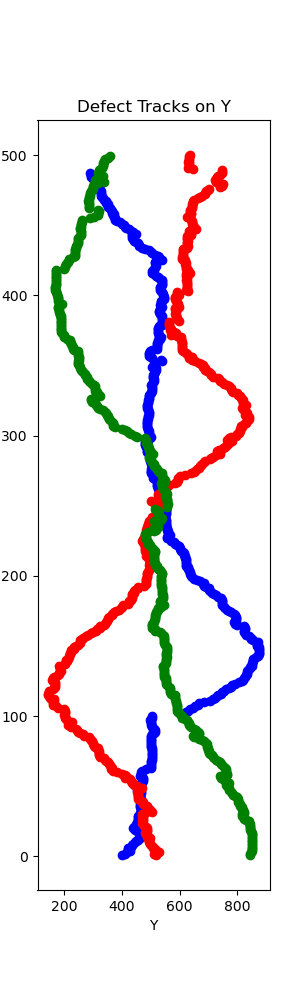

In [5]:
fig,ax = plt.subplots(1,1,figsize=(3,10))

ax.scatter(data_track_1['Y'],data_track_1['Slice'],marker='o',color='b')
ax.scatter(data_track_2['Y'],data_track_2['Slice'],marker='o',color='r')
ax.scatter(data_track_3['Y'],data_track_3['Slice'],marker='o',color='g')
ax.set_xlabel('Y')
ax.set_ylabel('Frames')
ax.set_title('Defect Tracks on Y')
plt.show()

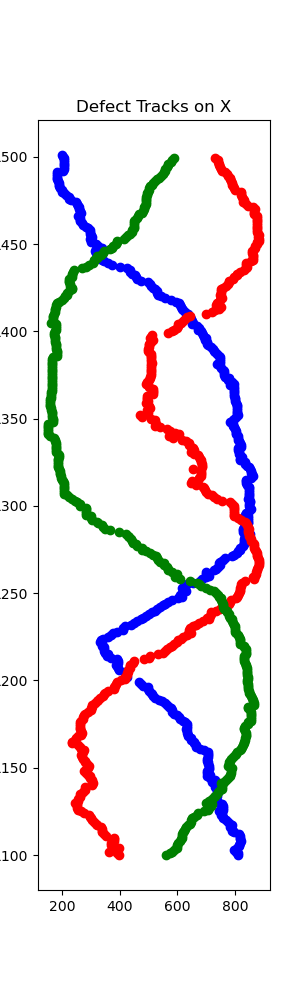

In [6]:
fig,ax = plt.subplots(1,1,figsize=(3,10))

# ax.plot(data_track_1['X'],data_track_1['Slice']+1100-1,marker='o')
# ax.plot(data_track_2['X'],data_track_2['Slice']+1100-1,marker='o')
# ax.plot(data_track_3['X'],data_track_3['Slice']+1100-1,marker='o')
ax.scatter(data_track_1['X'][:400],data_track_1['Slice'][:400]+1100-1,marker='o',color='b')
ax.scatter(data_track_2['X'][:400],data_track_2['Slice'][:400]+1100-1,marker='o',color='r')
ax.scatter(data_track_3['X'][:400],data_track_3['Slice'][:400]+1100-1,marker='o',color='g')
#ax.set_xlabel('X')
ax.set_ylabel('Frames')
ax.set_title('Defect Tracks on X')
plt.show()

In [25]:
data_track_3['Slice']+1100-1

1000    1100
1001    1101
1002    1102
1003    1103
1004    1104
        ... 
1495    1595
1496    1596
1497    1597
1498    1598
1499    1599
Name: Slice, Length: 500, dtype: int64

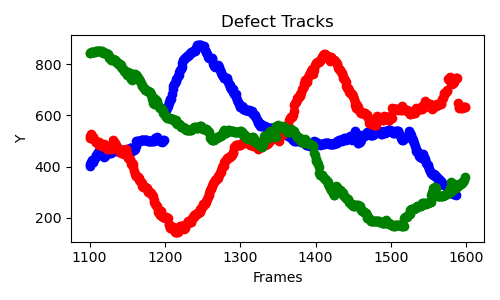

In [10]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
X_Y_Spline1 = interpolate.interp1d(data_track_1['Slice'],data_track_1['Y'], kind = "cubic")
X_Y_Spline2 = interpolate.interp1d(data_track_2['Slice'],data_track_2['Y'], kind = "cubic")
X_Y_Spline3 = interpolate.interp1d(data_track_3['Slice'],data_track_3['Y'], kind = "cubic")

#X_Y_Spline1 = interpolate.make_interp_spline(data_track_1['Slice'],data_track_1['Y'])
#X_Y_Spline2 = interpolate.make_interp_spline(data_track_2['Slice'],data_track_2['Y'])
#X_Y_Spline3 = interpolate.make_interp_spline(data_track_3['Slice'],data_track_3['Y'])

num_interpolation_points = 100
X_1 = np.linspace(data_track_1['Slice'].min(), data_track_1['Slice'].max(), num_interpolation_points)
Y_1 = X_Y_Spline1(X_1)
X_2 = np.linspace(data_track_2['Slice'].min(), data_track_2['Slice'].max(), num_interpolation_points)
Y_2 = X_Y_Spline2(X_2)
X_3 = np.linspace(data_track_3['Slice'].min(), data_track_3['Slice'].max(), num_interpolation_points)
Y_3 = X_Y_Spline3(X_3)

ax.scatter(data_track_1['Slice']+1100-1,data_track_1['Y'],marker='o',color='b')
#ax.scatter(Y_1,X_1+1100-1,marker='o',color='b')

ax.scatter(data_track_2['Slice']+1100-1,data_track_2['Y'],marker='o',color='r')
#ax.scatter(Y_2,X_2+1100-1,marker='o',color='r')

ax.scatter(data_track_3['Slice']+1100-1,data_track_3['Y'],marker='o',color='g')
#ax.scatter(Y_3,X_3+1100-1,marker='o',color='g')
ax.set_xlabel('Frames')
ax.set_ylabel('Y')
ax.set_title('Defect Tracks')
plt.tight_layout()
plt.show()

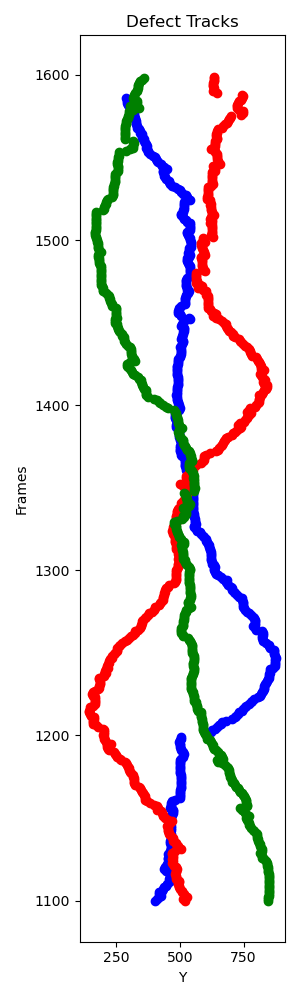

In [14]:
fig,ax = plt.subplots(1,1,figsize=(3,10))
X_Y_Spline1 = interpolate.interp1d(data_track_1['Slice'],data_track_1['Y'], kind = "cubic")
X_Y_Spline2 = interpolate.interp1d(data_track_2['Slice'],data_track_2['Y'], kind = "cubic")
X_Y_Spline3 = interpolate.interp1d(data_track_3['Slice'],data_track_3['Y'], kind = "cubic")

#X_Y_Spline1 = interpolate.make_interp_spline(data_track_1['Slice'],data_track_1['Y'])
#X_Y_Spline2 = interpolate.make_interp_spline(data_track_2['Slice'],data_track_2['Y'])
#X_Y_Spline3 = interpolate.make_interp_spline(data_track_3['Slice'],data_track_3['Y'])

num_interpolation_points = 100
X_1 = np.linspace(data_track_1['Slice'].min(), data_track_1['Slice'].max(), num_interpolation_points)
Y_1 = X_Y_Spline1(X_1)
X_2 = np.linspace(data_track_2['Slice'].min(), data_track_2['Slice'].max(), num_interpolation_points)
Y_2 = X_Y_Spline2(X_2)
X_3 = np.linspace(data_track_3['Slice'].min(), data_track_3['Slice'].max(), num_interpolation_points)
Y_3 = X_Y_Spline3(X_3)

ax.scatter(data_track_1['Y'],data_track_1['Slice']+1100-1,marker='o',color='b')
#ax.scatter(Y_1,X_1+1100-1,marker='o',color='b')

ax.scatter(data_track_2['Y'],data_track_2['Slice']+1100-1,marker='o',color='r')
#ax.scatter(Y_2,X_2+1100-1,marker='o',color='r')

ax.scatter(data_track_3['Y'],data_track_3['Slice']+1100-1,marker='o',color='g')
#ax.scatter(Y_3,X_3+1100-1,marker='o',color='g')
ax.set_xlabel('Y')
ax.set_ylabel('Frames')
ax.set_title('Defect Tracks')
plt.tight_layout()
plt.show()